In [238]:
# importación de libreríás
import numpy as np
from matplotlib import pyplot as plt
import time
from scipy.stats import norm

# P1

de [La documentación de Python](https://docs.python.org/3/library/random.html)

Almost all module functions depend on the basic function random(), which generates a random float uniformly in the semi-open range [0.0, 1.0). Python uses the Mersenne Twister as the core generator. It produces 53-bit precision floats and has a period of 2**19937-1. The underlying implementation in C is both fast and threadsafe. The Mersenne Twister is one of the most extensively tested random number generators in existence. However, being completely deterministic, it is not suitable for all purposes, and is completely unsuitable for cryptographic purposes.

En resumen, la función $\text{random.random()}$ genera un número pseudo aleatorio uniforme en $[0,1]$, de forma de que:
* El número posee 53 bits de precisión.
* Posee un periodo de $2^{19937}-1$.
* Lo logra usando el método __Mersenne Twister__.

Para cambiar la semilla, se utiliza el comando $\text{random.seed(semilla)}$, que recibe un entero y configura la forma en que se genera el número aleatorio.

Una forma astuta de setear la semilla es utilizar un número entero generado por variables externas al computador, como por ejemplo el tiempo en que se ejecuta el código.

**falta explicar algo del método _mersenne twister_ ?**
se podría ver la wikipedia jeje
https://es.wikipedia.org/wiki/Mersenne_twister
https://es.wikipedia.org/wiki/N%C3%BAmero_primo_de_Mersenne

# P2
Se calculan las varianzas teóricas de

$$ X = \sqrt{1-U^2},\quad Z = 1_{\{U_1^2+U_2^2 \leq 1\}},$$ 
con $U,U_1,U_2$ variables uniformes en $[0,1]$ independientes.

----

Para $\mathbb V(X)$, se separa la varianza,
$$ \mathbb V(X) = E(X^2) - E(X)^2 $$
Se usa el hecho de que,
$$ X^2 = 1-U^2 $$
Luego,
$$ \mathbb V(X) = 1-E(U^2) - E(\sqrt{1-U^2})^2.$$
Se calcula individualmente las esperanzas,

$$ \begin{matrix}E\left(\sqrt{1-U^2}\right) & = & \int_0^1 \sqrt{1-x^2} f_U(x)\ dx = \int_0^1 \sqrt{1-x^2} \ dx \underset{enunciado}{=} I = \frac{\pi}{4}, \\ E(U^2) & = & E(U^2) - E(U)^2 + E(U)^2 = \mathbb V(U) + E(U)^2 = \frac{(1-0)^2}{12} + \frac{1}{4} = \frac{1+3}{12} = \frac{1}{3}.  \end{matrix}   $$

$$ \mathbb V(X) =  1- \frac{1}{3} - \frac{\pi^2}{16} \approx 0.0498$$

----

Para $\mathbb V(Z)$ es más simple, se utiliza el hecho de que el cuadrado de una indicatriz es ella misma.

$$\mathbb V(Z) = E((1_{U_1^2+U_2^2 \leq 1})^2) - E(Z)^2 = E(Z) - E(Z)^2 \underset{enunciado}{=} \frac{\pi}{4} - \frac{\pi^2}{16} = \pi\frac{4-\pi}{16} \approx 0,1685. $$

In [11]:
def sim1(n):
    U=np.random.uniform(size=n)
    X=np.zeros(n)
    for i in range(n):
        X[i]=np.sqrt(1-U[i]**2)
    return X

0.05073706947998434

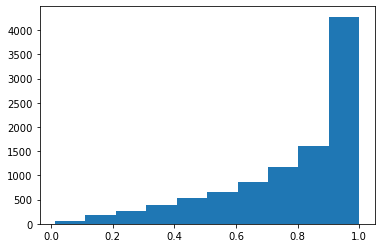

In [16]:
X=sim1(10000)
plt.hist(X)
np.var(X)

In [19]:
def sim2(n):
    U1=np.random.uniform(size=n)
    U2=np.random.uniform(size=n)
    Z=np.zeros(n)
    for i in range(n):
        Z[i]=(U1[i]**2+U2[i]**2<=1)
    return Z

0.15939899999999999

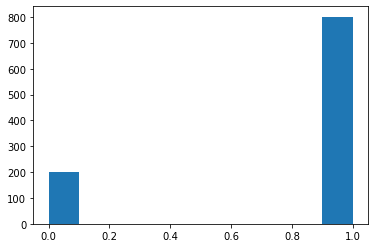

In [20]:
Z=sim2(1000)
plt.hist(Z)
np.var(Z)

In [22]:
varZ=np.pi*(4-np.pi)/16

In [179]:
varX=2/3-np.pi**2/16

In [182]:
def nminX():
    n=1
    X=sim1(n)
    while abs(np.var(X)-varX)/varX > 0.01:
        n+=1
        X=sim1(n)
    return n,np.var(X)

In [228]:
nminX()

(80, 0.05012357833639982)

40.903

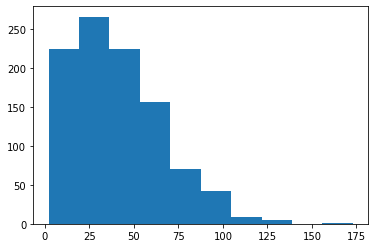

In [181]:
nX=np.zeros(1000)
for i in range(1000):
    nX[i]=nminX()
plt.hist(nX)
np.mean(nX)

In [230]:
def nminZ():
    n=1
    Z=sim2(n)
    while abs(np.var(Z)-varZ)/varZ > 0.01:
        n+=1
        Z=sim2(n)
    return n

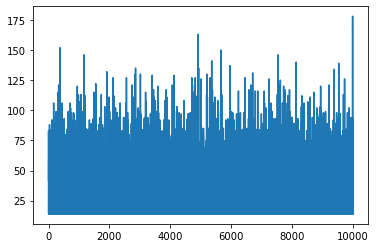

In [272]:
nZ=np.zeros(10000)
for i in range(10000):
    nZ[i]=nminZ()
plt.plot(range(10000),nZ)

In [263]:
Z010=scipy.stats.norm.ppf(0.95)
Err1=0.1
Z005=scipy.stats.norm.ppf(0.975)
Err2=0.01
Z001=scipy.stats.norm.ppf(0.995)
Err3=0.001

In [265]:
n10X=(varX) * (Z010**2) / (Err1**2)
n5X=(varX) * (Z005**2) / (Err2**2)
n1X=(varX) * (Z001**2) / (Err3**2)
n10X,n5X,n1X

(13.478041219619655, 1913.6761692152459, 330526.60729257186)

In [266]:
n10Z=(varZ) * (Z010**2) / (Err1**2)
n5Z=(varZ) * (Z005**2) / (Err2**2)
n1Z=(varZ) * (Z001**2) / (Err3**2)
n10Z,n5Z,n1Z

(45.601363597111366, 6474.697723322015, 1118297.8113857964)

In [275]:
def esperanzaX(n):
    return np.mean(sim1(n))
def esperanzaZ(n):
    return np.mean(sim2(n))

In [277]:
np.pi/4

0.7853981633974483

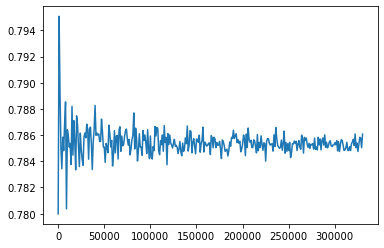

In [284]:
eX=[]
NX=[]
n=100
while n<n1X:
    eX.append(esperanzaX(n))
    NX.append(n)
    n+=1000
plt.plot(NX,eX)

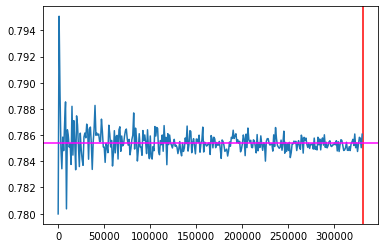

In [298]:
plt.axvline(x=n1X,color='red')
plt.plot(NX,eX)
plt.axhline(y=np.pi/4,color='magenta')

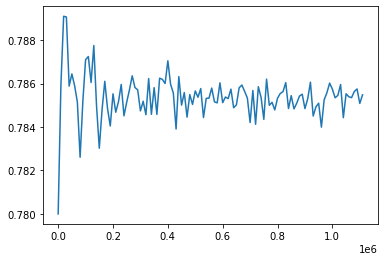

In [283]:
eZ=[]
NZ=[]
n=100
while n<n1Z:
    eZ.append(esperanzaZ(n))
    NZ.append(n)
    n+=10000
plt.plot(NZ,eZ)

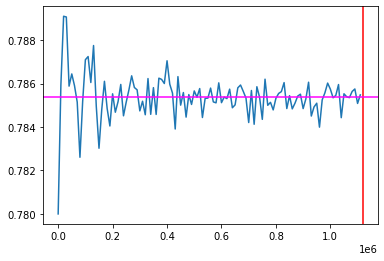

In [293]:
plt.axvline(x=n1Z,color='red')
plt.plot(NZ,eZ)
plt.axhline(y=np.pi/4,color='magenta')

In [2]:
def simulacion1(func,n,a=0,b=1):
    subsets= np.arange(0,n+1,n/10)
    steps=n/10
    u=np.zeros(n)
    for i in range(10):
        start= int(subsets[i])
        end=int(subsets[i+1])
        u[start:end] = np.random.uniform(low=i/10,high=(i+1)/10,size=end-start)
    np.random.shuffle(u)
    u_func=func(a+(b-a)*u)
    s= ((b-a)/n)*u_func.sum()
    
    return s

In [3]:
def dist1(x):
    return np.sqrt(1-x**2)

In [4]:
simulacion1(dist1,100)

0.7790148308469259

## parte 4


sobre intervalos de confianza: https://en.wikipedia.org/wiki/Confidence_interval#Statistical_theory

# P3

In [ ]:
def DiscreteQuantile(f,u):
    return n

def DiscreteQuantileF(F,u):
    return n

def ContinuousQuantile(F,f,u):
    error=10**(-4)
    return x

# P4

In [15]:
# medir tiempo
import time

t_inicial = time.time()
## hacer algo aquí
t_final   = time.time()
tiempo_ejecucion = t_final - t_inicial

#print(tiempo_ejecucion)


x = np.array([1,2,3])
y = np.array([1,3,4]) # indices 0 hasta 2, (0 ... n-1,   n=len(y))
print(x+y)

[2 5 7]
